In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('pretty')
%matplotlib notebook
import ipywidgets as widgets

In [2]:
def get_steadystate_analytical(xFF, I_N=1, I_S=0, b=0.5, w_NS=0.5, alphaN=1, alphaS=1, expS=1.3, r0=0.5, p0=0.1):
        
    xN = I_N + alphaN*xFF
    xS = I_S+alphaS*xFF**expS
    
    rS = xS
    
    rN_1 = np.maximum(xN - w_NS*xS, 0)
    rN_2 = xN - p0*w_NS*xS
    rN_3 = (xN - (1+b*r0)*w_NS*xS)/(1-b*w_NS*xS)
    
    p_1 = 1
    p_2 = p0
    p_3 = 1-b*(rN_3-r0)
    
    p_3[rN_3<0] = np.nan
    rN_3[rN_3<0] = np.nan
    
    rN_1[rN_1>=r0] = np.nan
    rN_2[rN_2<=r0+1/b] = np.nan
    
    return [rN_1, rN_2, rN_3], rS, [p_1, p_2, p_3]

def get_phase_portrait(xFF, I_N=1, I_S=0, b=0.5, w_NS=0.5, alphaN=1, alphaS=1, expS=1., tauN=5, taup=50):
    """ TO FIX!"""
    
    
    rN = np.linspace(0, 5, 15)
    p = np.linspace(0, 1, 15)

    RN, P = np.meshgrid(rN, p)
    
    u, v = np.zeros(RN.shape), np.zeros(P.shape)
    
    for i, rN_i in enumerate(rN):
        for j, p_i in enumerate(p):
            u[i, j] = (-rN_i - p_i*w_NS*(I_S+alphaS*xFF**expS) + I_N + alphaN*xFF)/tauN
            v[i, j] = (-p_i + 1 - b*rN_i)/taup
            
    return RN, P, u, v

<IPython.core.display.Javascript object>


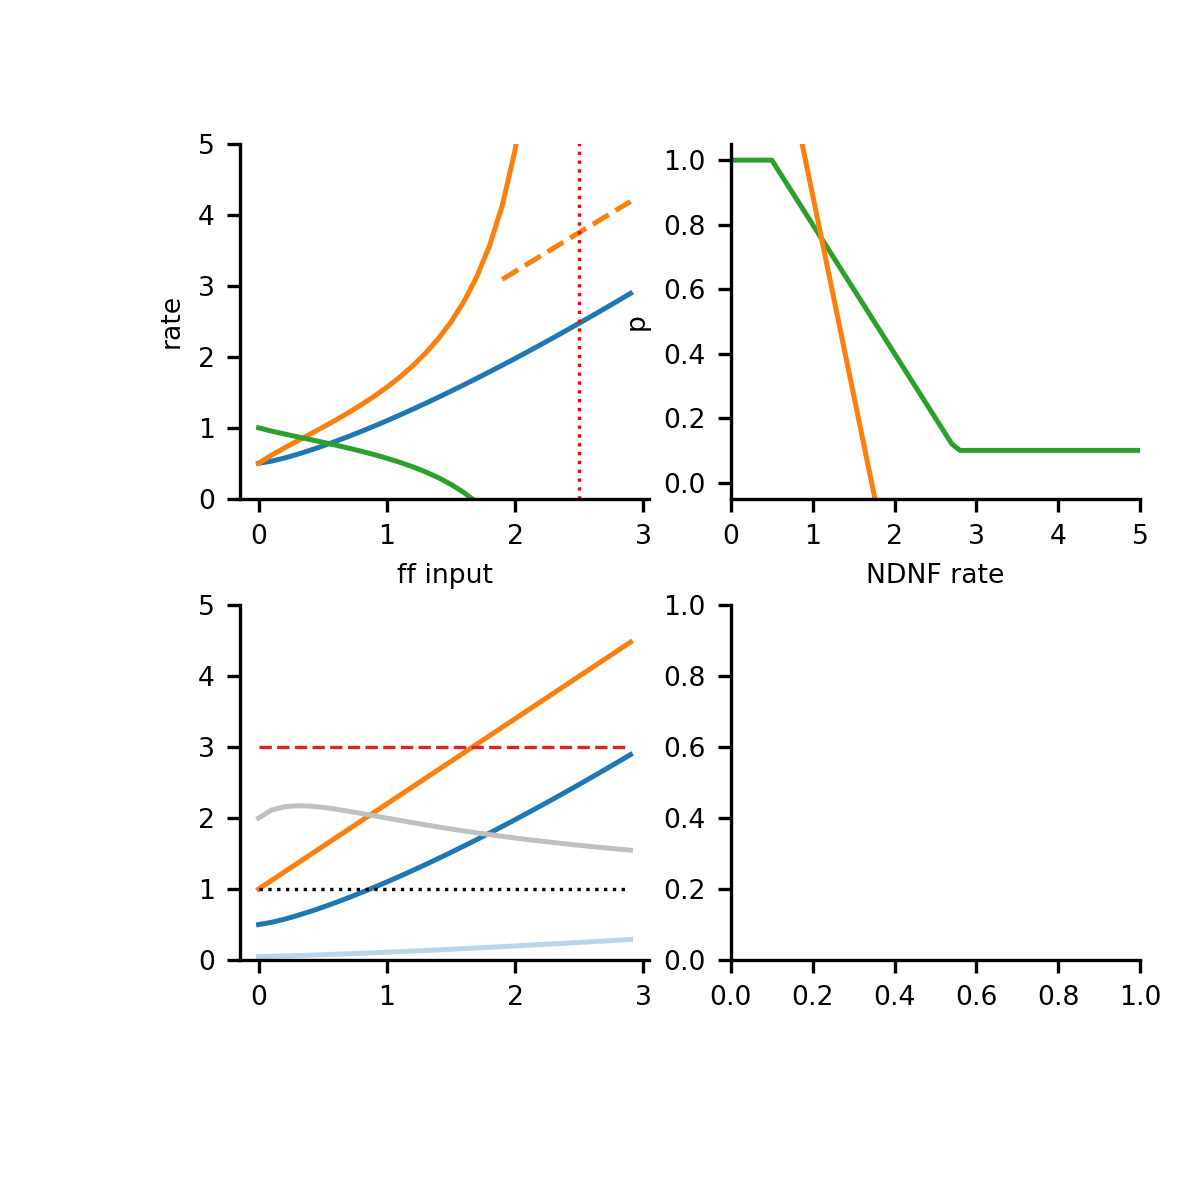

interactive(children=(FloatSlider(value=0.4, description='b', max=1.1, step=0.05), FloatSlider(value=1.0, desc…

In [3]:
# set up figure
from itertools import product
fig, ax_widget = plt.subplots(2, 2, figsize=(5, 5), dpi=150,
                              gridspec_kw={'left': 0.2, 'bottom': 0.2, 'right': 0.95, 'hspace': 0.3})
ax_widget[0, 0].set(ylim=[0, 5], xlabel='ff input', ylabel='rate')
ax_widget[0, 1].set(ylim=[-0.05, 1.05], xlim=[0,5], xlabel='NDNF rate', ylabel='p')
ax_widget[1, 0].set(ylim=[0, 5])
cols = ['lightsalmon', 'red', 'firebrick']

# Create figure with sliders
@widgets.interact(b=(0, 1.1, 0.05), w_NS=(0, 2, 0.2), I_S=(0, 2, 0.1), I_N=(0, 5.1, 0.5), alphaN=(0, 2, 0.1),
                  alphaS=(0, 2, 0.2), xFF=(0, 5, 0.2), expS=(1, 2, 0.1), r0=(0, 2, 0.5), p0=(0, 0.2, 0.05))

def update(b=0.4, w_NS=1, I_S=0.5, I_N=1, alphaN=1.4, alphaS=1.2, xFF=0, expS=1.3, r0=0.5, p0=0.1):
    """Remove old lines from plot and plot new one"""
    
    for i, j in product([0, 1], [0, 1]):
        [l.remove() for l in ax_widget[i, j].lines]
        [l.remove() for l in ax_widget[i, j].lines]
        [l.remove() for l in ax_widget[i, j].lines]

        [l.remove() for l in ax_widget[i, j].collections]
        [l.remove() for l in ax_widget[i, j].collections]
        [l.remove() for l in ax_widget[i, j].patches]
        
        
    
    xff_list = np.arange(0, 3, 0.1)

    rN, rS, p = get_steadystate_analytical(xff_list, b=b, w_NS=w_NS, I_S=I_S, I_N=I_N, alphaN=alphaN, alphaS=alphaS,
                                          expS=expS, r0=r0, p0=p0)
    ax_widget[0,0].plot(xff_list, rN[2], c='C1', label='NDNF rate')
    ax_widget[0,0].plot(xff_list, rN[0], '--', c='C1', label='NDNF rate')
    ax_widget[0,0].plot(xff_list, rN[1], '--', c='C1', label='NDNF rate')
    
#     ax_widget[0,0].plot(xff_list, I_N+alphaN*xff_list, '--', c='C1')
    ax_widget[0,0].plot(xff_list, rS, c='C0', label='SOM rate', zorder=-1)
    ax_widget[0,0].plot(xff_list, p[2], c='C2', label='p')
#     ax_widget[0,0].plot(xff_list, p*rS, c='darkblue', ls='--', label='p*rS')

#     ax_widget[0].plot(xff_list, stab, c='C3', ls='--', label='stability')
    stab_criterion = w_NS*(I_S+alphaS*xff_list**expS)*b
    unstab = np.where(stab_criterion>1)[0]
    if len(unstab)>0:
        ax_widget[0,0].vlines(xff_list[unstab[0]-1], 0, 8, color='r', ls=':', lw=1)
    
    # draw nullclines
    rns = np.arange(0, 5.1, 0.1)
    p_nc = np.clip(1-b*(rns-r0), p0, 1)
    SOMinh = w_NS*(I_S + alphaS*xFF**expS)
    rN_nc = (-rns + I_N + alphaN*xFF)/SOMinh
    
#     RN, P, U, V = get_phase_portrait(xFF, b=b, w_NS=w_NS, I_S=I_S, I_N=I_N, alphaN=alphaN, alphaS=alphaS,
#                                           expS=expS, tauN=5, taup=50)
#     ax_widget[0, 1].streamplot(RN, P, U.T, V.T, color='silver', linewidth=1, density=1, arrowsize=0.8)
#     ax_widget[0, 1].quiver(RN, P, U.T, V.T, color='silver', linewidth=1)
    
    
    ax_widget[0,1].plot(rns, p_nc, c='C2')
    ax_widget[0,1].plot(rns, rN_nc, c='C1')
    
    # plot SOM/NDNF input as function of xff
    xSw = w_NS*(I_S+alphaS*xff_list**expS)
    xN = I_N+alphaN*xff_list
    ax_widget[1, 0].plot(xff_list, xN, c='C1')
    ax_widget[1, 0].plot(xff_list, xSw, c='C0')
    ax_widget[1, 0].plot(xff_list, p0*xSw, c='C0', alpha=0.3)
    ax_widget[1, 0].plot(xff_list, xN/xSw, c='silver')
    
    ax_widget[1, 0].hlines(r0+1/b, 0, xff_list[-1], linestyle='--', color='C3', linewidth=1)
    ax_widget[1, 0].hlines(1, 0, xff_list[-1], linestyle=':', color='k', linewidth=1)
    
    
#     ax_widget.plot(arousal, ratePC_inactNDNF, c=cols[1], label='PC (xNDNF)')
#     ax_widget.plot(arousal, ratePV, c='C0', label='PV rate', zorder=-1, alpha=0.5)
#     ax_widget.plot(arousal, rateNDNF, c='C1', label='NDNF rate', zorder=-1, alpha=0.5)
#     ax_widget.legend(loc='upper left', frameon=False, fontsize=7)
        
plt.show()

In [5]:
def simulate_circuit(dur, I_N=1, I_S=0.5, b=0.4, w_NS=1, alphaN=1, alphaS=1, dt=1, I_FF=0, expS=1.3, r0=0.5, p0=0.1):
    
    t = np.arange(0, dur, 1)
    xFF = np.zeros(len(t))
#     xFF[500:600] = 1
#     xFF[600:700] = 2
#     xFF[700:800] = 3
#     xFF[800:900] = 4
#     xFF[900:1000] = 5
#     xFF = np.clip((t-500)*0.005, 0, I_FF)
    xFF[400:] = I_FF
    xFF[750:] = 0
    
    print(w_NS*(I_S+alphaS*I_FF)*b)
    
    
    tauN = 20
    tauS = 10
    tauP = 100
    
    rN_store = []
    rS_store = []
    p_store = []
    inp_store = []
    
    rN = I_N + alphaN*xFF[0]
    rS = I_S + alphaS*xFF[0]**expS
    p = np.clip(1-b*(rN-r0), p0, 1)
    
    xffi = 0
    h = 0
    tau_in = 100
    
    for i, ti in enumerate(t):
        
        if ti>400:
#             h += (-h + xFF[i])/tau_in*dt
            xffi += (-xffi + xFF[i])/tau_in*dt
#         xffi = xFF[i]

        
        noise = np.random.normal(0, 0.5)*0
        rS = I_S + alphaS*xffi**expS
        rN = np.maximum(rN + (-rN -p*w_NS*rS + I_N + alphaN*xffi)/tauN*dt, 0)
#         rS = np.maximum(rS + (-rS + I_S + alphaS*xFF[i])/tauN*dt, 0)
        p = np.clip(p + (-p + 1 - b*(rN-r0))/tauP*dt, p0, 1)
        
        rN_store.append(rN)
        rS_store.append(rS)
        p_store.append(p)
        inp_store.append(xffi)
        
    return t, np.array(rN_store), np.array(rS_store), np.array(p_store), np.array(inp_store)      

<IPython.core.display.Javascript object>


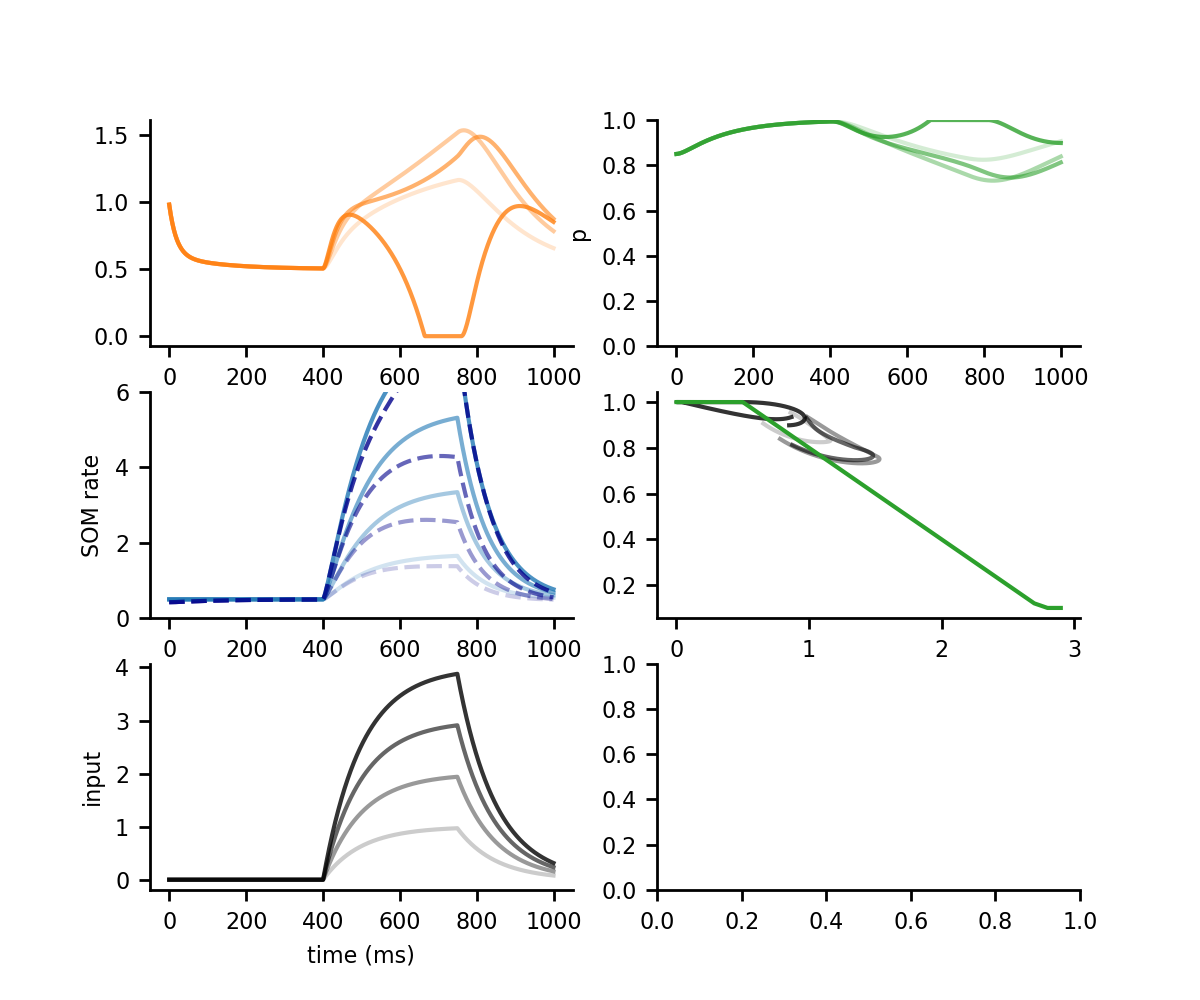

0.51
0.87
1.2299999999999998
1.5899999999999999


In [6]:
fig, ax = plt.subplots(ncols=2, nrows=3, dpi=150, figsize=(6, 5), sharex=False)

for i, I_FF in enumerate([1, 2, 3, 4]):
    t, rN, rS, p, xff = simulate_circuit(1000, alphaS=1.2, alphaN=1.6, w_NS=1, b=0.3, I_N=1, I_S=0.5, I_FF=I_FF, expS=1.3,
                                        r0=0.5, p0=0.1)
    ax[1, 0].plot(t, rS, c='C0', alpha=(i+1)/5)

    ax[0, 0].plot(t, rN, c='C1', alpha=(i+1)/5)
    ax[0, 1].plot(t, p, c='C2', alpha=(i+1)/5)
    ax[1, 0].plot(t, p*rS, c='darkblue', ls='--', alpha=(i+1)/5)
    ax[2, 0].plot(t, xff, 'k', alpha=(i+1)/5)
    ax[1, 1].plot(rN[500:], p[500:], 'k', alpha=(i+1)/5)
# ax[0].set(ylim=[0, 2], ylabel='NDNF rate')
ax[1, 0].set(ylim=[0, 6], ylabel='SOM rate')
ax[2, 0].set(ylabel='input', xlabel='time (ms)')
ax[0, 1].set(ylabel='p', xlabel='time (ms)', ylim=[0, 1])
rns = np.arange(0, 3, 0.1)
ax[1, 1].plot(rns, np.clip(1-0.4*(rns-0.5), 0.1, 1), c='C2')

plt.show()

<IPython.core.display.Javascript object>


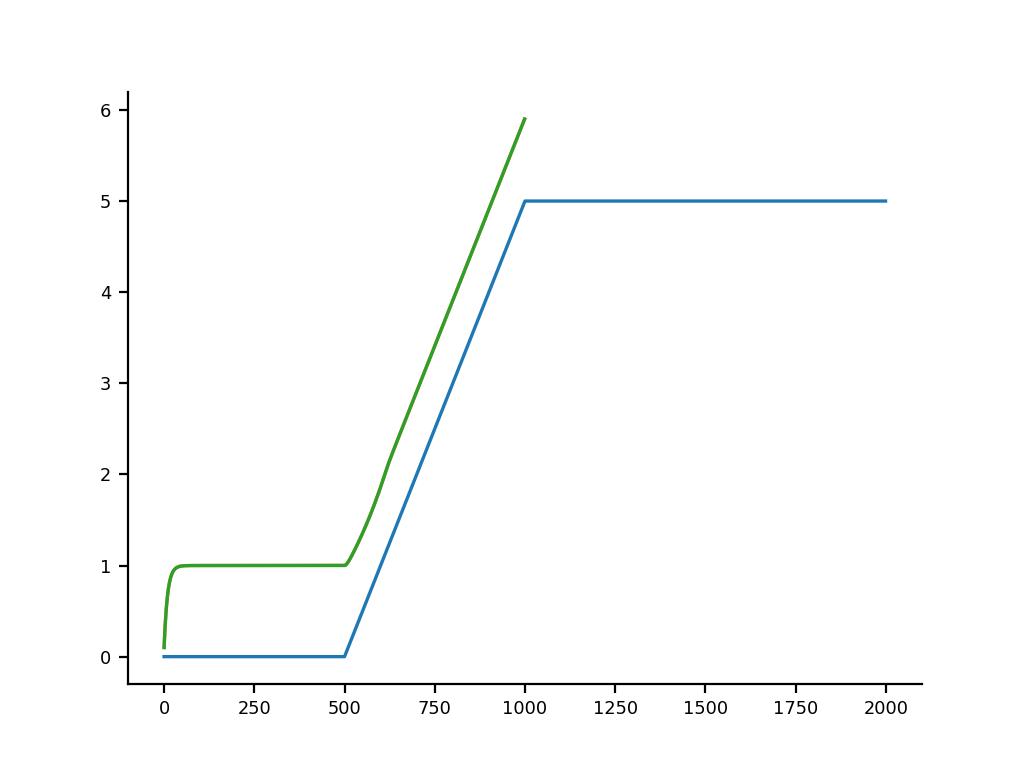

In [41]:
plt.figure()
plt.plot(xff)
plt.show()

<IPython.core.display.Javascript object>


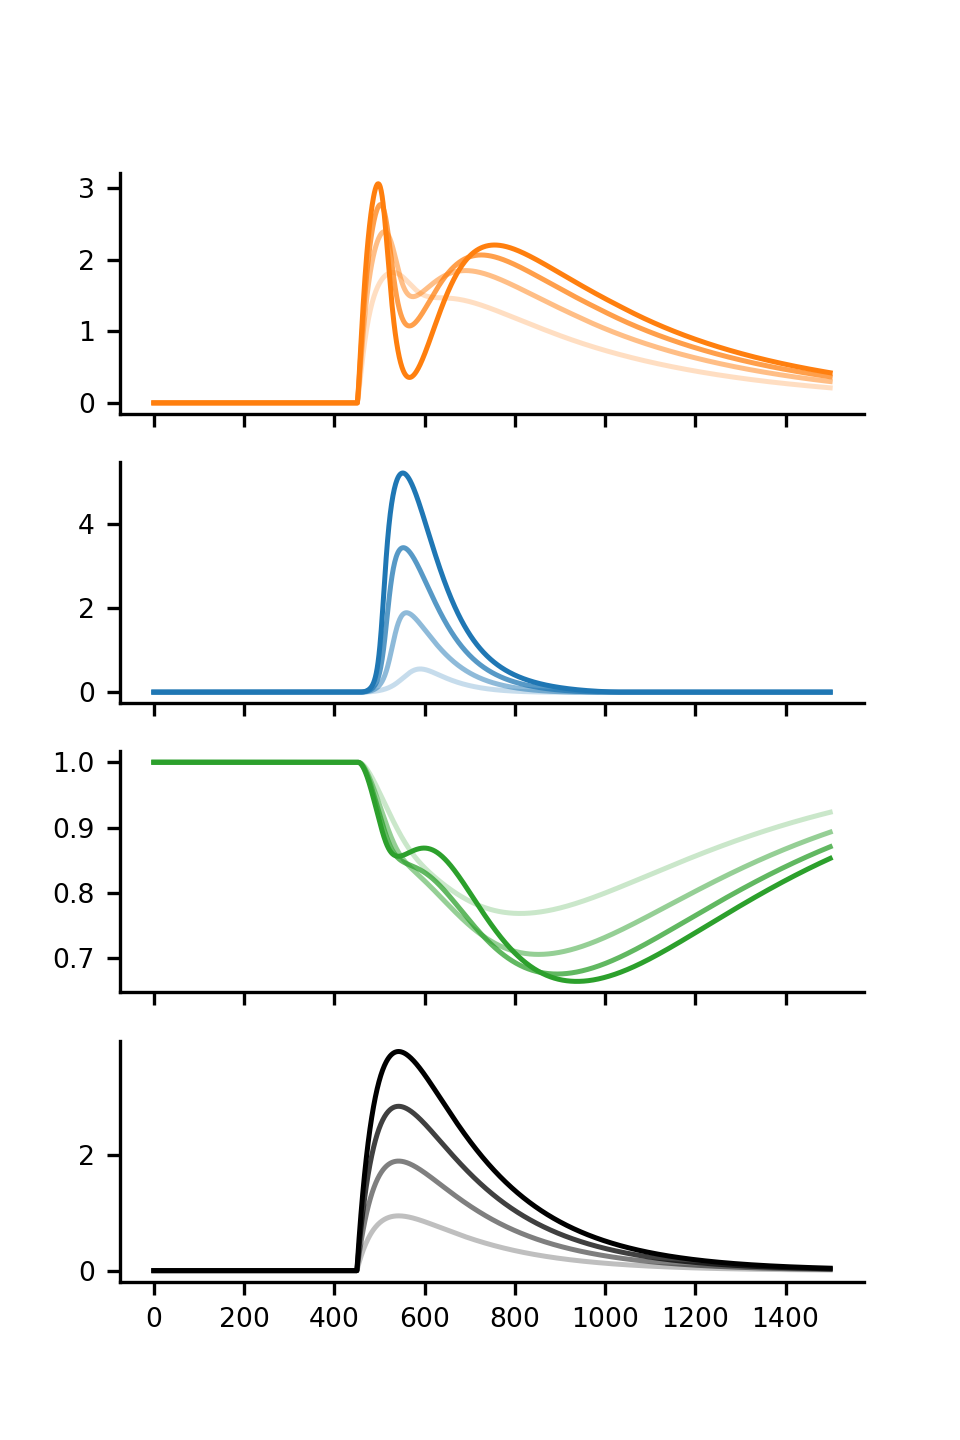

In [4]:
def run_stf(I_S=1):

    t = np.arange(1500)
    dt = 1
    xS = np.zeros(len(t))
    xS[500:800] = I_S
    xN = np.zeros(len(t))
    xN[450:850] = I_S
    
    tau1 = 200
    tau2 = 50
    
    ts = 450
    x_alpha = 2*np.maximum(I_S*(np.exp(-(t-ts)/tau1) - np.exp(-(t-ts)/tau2)), 0)

    tauS = 10
    tauN = 10
    tauE = 20
    
    alphaN = 2
    wNS =  0.8

    U_S = 0.1
    tauf = 200
    
    tau_a = 100
    ba = 1
    
    taup = 200
    b = 0.2

    rS = [0]
    uS = [U_S]
    rN = [0]
    rE = [0]
    p = [1]
    a = 0

    for i in range(len(t)-1):

        drE = (-rE[i] + x_alpha[i])/tauE
        drN = (-rN[i] + alphaN*x_alpha[i]**0.5 - p[-1]*wNS*rS[i])/tauN
        drS = (-rS[i] + uS[i]*rE[i]**1.5 - a)/tauS
        da = (-a + ba*rS[-1])/tau_a
        duS = (U_S-uS[i])/tauf + U_S*(1-uS[i])*rS[i]
        dp = (-p[-1] + 1 - b*rN[-1])/taup

        rE.append(np.maximum(rE[-1]+drE*dt, 0))
        rN.append(np.maximum(rN[-1]+drN*dt, 0))
        rS.append(np.maximum(rS[-1]+drS*dt, 0))
            uS.append(uS[-1]+duS*dt)
        p.append(np.clip(p[-1]+dp*dt, 0, 1))
        
        a += da*dt
    
    return t, rS, uS, rN, x_alpha, p

fig, ax = plt.subplots(4, 1, figsize=(4, 6), dpi=150, sharex=True)

for i, xin in enumerate([1, 2, 3, 4]):
    t, rS, uS, rN, xS, p = run_stf(I_S=xin)
    ax[0].plot(t, rN, c='C1', alpha=(i+1)/4)
    ax[1].plot(t, rS, c='C0', alpha=(i+1)/4)
    ax[2].plot(t, p, c='C2', alpha=(i+1)/4)
    ax[3].plot(t, xS, c='k', alpha=(i+1)/4)

<IPython.core.display.Javascript object>


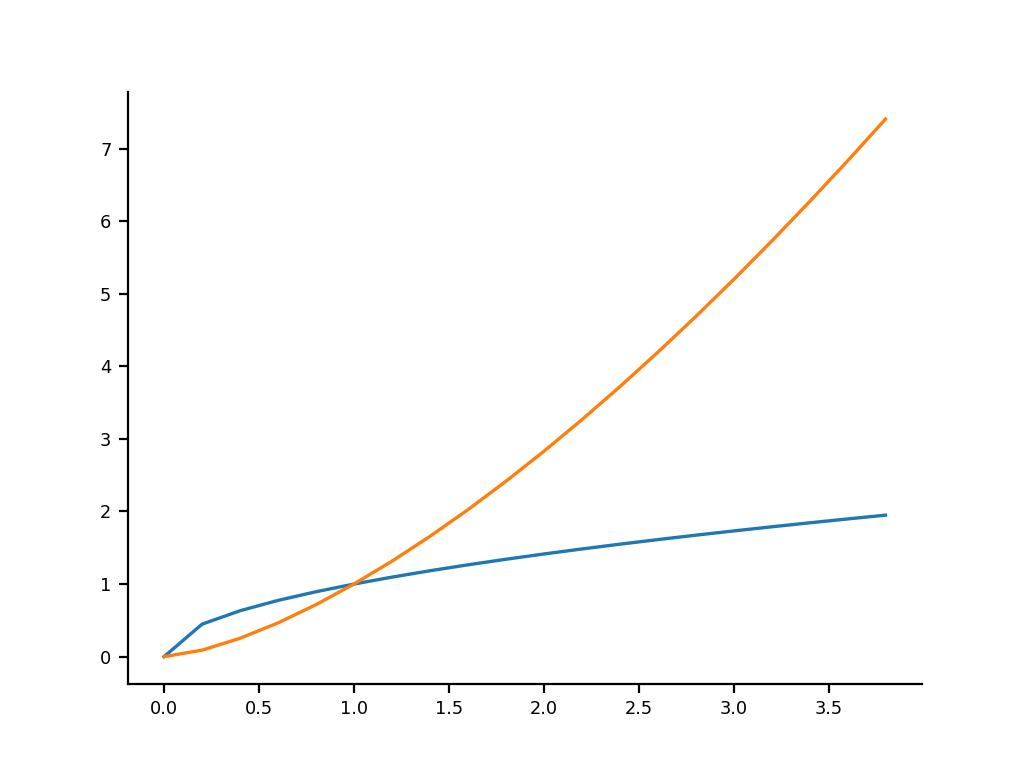

In [136]:
x = np.arange(0, 4, 0.2)
plt.figure()
plt.plot(x, x**0.5)
plt.plot(x, x**1.5)
plt.show()